#  Step 1: Data Exploration

In [1]:
import pandas as pd
# Loading Data in Pandas Data Frames
trainDF=pd.read_csv('train.csv',index_col=0)
testDF=pd.read_csv('test.csv',index_col=0)
trainDF.location=trainDF.location.apply(lambda x: int(x.split(' ')[1]))
testDF.location=testDF.location.apply(lambda x: int(x.split(' ')[1]))
# trainDF.describe()
trainDF.head()

,location,fault_severity
id,,
14121,118,1
9320,91,0
14394,152,1
8218,931,1
14804,120,0


In [2]:
print 'unique location values: '+str(len(trainDF.location.unique()))
print 'size of training dataset: '+str(len(trainDF))
print 'size of test dataset: '+str(len(testDF))

unique location values: 929
size of training dataset: 7381
size of test dataset: 11171


In [3]:
eventTypeDF=pd.read_csv('event_type.csv',index_col=0)
eventTypeDF.event_type=eventTypeDF.event_type.apply(lambda x: int(x.split(' ')[1]))
eventTypeDF.head()

,event_type
id,
6597,11
8011,15
2597,15
5022,15
5022,11


In [4]:
print 'unique event types: '+str(len(eventTypeDF.event_type.unique()))
print 'len of event types: '+str(len(eventTypeDF))
eventTypeDF.event_type.unique()

unique event types: 53
len of event types: 31170


array([11, 15, 20,  7, 34, 35,  9,  2, 54,  1,  6, 30, 29, 13, 22, 23, 18,
       14, 32,  3,  5, 28, 27, 10, 21, 31, 38, 24, 40,  8, 36, 12, 39, 19,
       33, 37, 25, 17, 41, 50, 46, 47, 49, 53, 44, 42, 45, 26,  4, 43, 52,
       51, 48])

In [5]:
logFeatureDF=pd.read_csv('log_feature.csv',index_col=0)
logFeatureDF.log_feature=logFeatureDF.log_feature.apply(lambda x: int(x.split(' ')[1]))
logFeatureDF.head()

,log_feature,volume
id,,
6597,68,6
8011,68,7
2597,68,1
5022,172,2
5022,56,1


In [7]:
len(logFeatureDF.volume.unique())

341

In [21]:
print 'unique log feature types: '+str(len(logFeatureDF.log_feature.unique()))
print 'len of log features: '+str(len(logFeatureDF))

unique log feature types: 386
len of log features: 58671


In [22]:
resourceTypeDF=pd.read_csv('resource_type.csv',index_col=0)
resourceTypeDF.resource_type=resourceTypeDF.resource_type.apply(lambda x: int(x.split(' ')[1]))
resourceTypeDF.head()

,resource_type
id,
6597,8
8011,8
2597,8
5022,8
6852,8


In [23]:
print 'unique resource types: '+str(len(resourceTypeDF.resource_type.unique()))
print 'len of resource types: '+str(len(resourceTypeDF))

unique resource types: 10
len of resource types: 21076


In [24]:
severityTypeDF=pd.read_csv('severity_type.csv',index_col=0)
severityTypeDF.severity_type=severityTypeDF.severity_type.apply(lambda x: int(x.split(' ')[1]))
severityTypeDF.head()

,severity_type
id,
6597,2
8011,2
2597,2
5022,1
6852,1


In [25]:
print 'unique severity types: '+str(len(severityTypeDF.severity_type.unique()))
print 'len of severity types: '+str(len(severityTypeDF))

unique severity types: 5
len of severity types: 18552


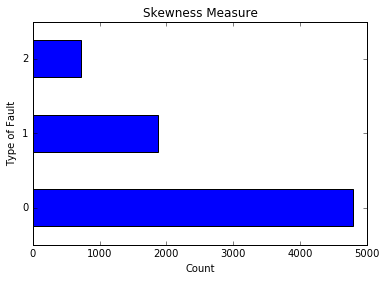

In [26]:
from matplotlib import pyplot as plt
%matplotlib inline
trainDF.fault_severity.value_counts().plot(kind='barh',title='Skewness Measure')
plt.ylabel('Type of Fault')
plt.xlabel('Count')

We can see that this is a skewed dataset, data with no fault is the highest than the other classes


In [27]:
# https://github.com/nikogamulin/kaggle-telstra-network-disruptions/blob/master/data_explorer.ipynb
# locwise=trainDF.groupby('fault_severity')
# locwise.head()
pd.crosstab(trainDF.fault_severity,trainDF.location)
# locCount=trainDF.groupby('location').count()

# locCount.id.plot.hist(bins=30)

location,1,2,3,4,5,6,7,8,9,10,...,1115,1116,1117,1118,1119,1120,1121,1122,1125,1126
fault_severity,,,,,,,,,,,,,,,,,,,,,
0,14,3,2,0,1,0,18,6,27,1,...,5,3,9,2,1,2,0,1,0,2
1,8,4,0,2,0,1,3,1,0,0,...,2,0,1,1,0,2,2,0,1,0
2,2,0,0,0,0,0,3,0,0,0,...,0,0,0,0,1,0,0,0,0,0


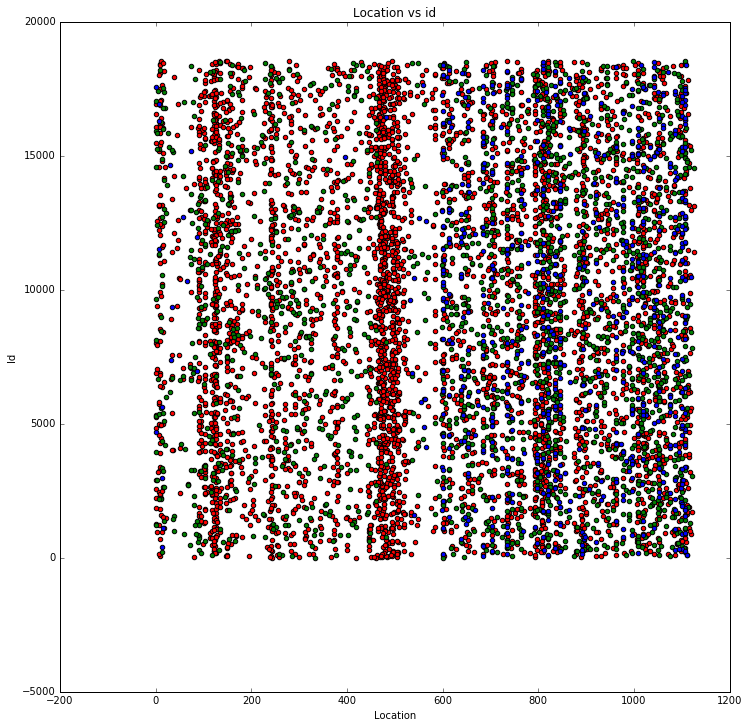

In [46]:
fig, ax = plt.subplots(figsize=(12,12))
for color, label in zip('rgb', [0, 1, 2]):
    ax.scatter(trainDF[trainDF.fault_severity==label].location,trainDF[trainDF.fault_severity==label].index,c=color,label=str(label))
#     plt.scatter(trainDF.location,trainDF.index, alpha=0.5, c=color, label=str(label))

plt.title('Location vs id')
plt.xlabel('Location')
plt.ylabel('Id')

In [14]:
# df=pd.merge(eventTypeDF,logFeatureDF,how='inner')
# trainDF.head()

In [58]:
trainDF[trainDF.fault_severity==0].volume

AttributeError: 'DataFrame' object has no attribute 'volume'

In [57]:
eventTypeVect=pd.get_dummies(eventTypeDF).groupby(eventTypeDF.index).sum()
logFeatureVect=pd.get_dummies(logFeatureDF).groupby(logFeatureDF.index).sum()
resourceTypeVect=pd.get_dummies(resourceTypeDF).groupby(resourceTypeDF.index).sum()
severityTypeVect=pd.get_dummies(severityTypeDF).groupby(severityTypeDF.index).sum()
df=df.join(eventTypeVect).join(logFeatureVect).join(resourceTypeVect).join(severityTypeVect)
df.head()

NameError: name 'df' is not defined

In [23]:
df.corr()

,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
location,1.000000,0.273488,-0.476308,-0.374713,-0.033848,0.520673,-0.322694
fault_severity,0.273488,1.000000,-0.146202,-0.115600,-0.012524,0.290357,-0.215521
event_type,-0.476308,-0.146202,1.000000,0.658854,0.156007,-0.442718,0.098970
log_feature,-0.374713,-0.115600,0.658854,1.000000,0.353457,-0.345048,0.069395
volume,-0.033848,-0.012524,0.156007,0.353457,1.000000,-0.105538,-0.030730
resource_type,0.520673,0.290357,-0.442718,-0.345048,-0.105538,1.000000,-0.343314
severity_type,-0.322694,-0.215521,0.098970,0.069395,-0.030730,-0.343314,1.000000


In [538]:
sorted(df.volume.unique().tolist())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 170,
 171,
 172,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 186,
 188,
 189,
 190,
 191,
 192,
 193

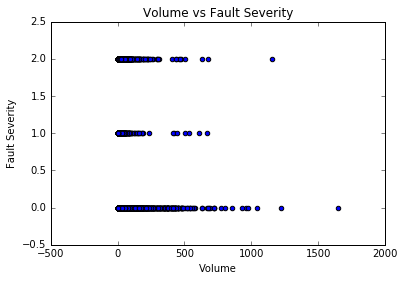

In [539]:
plt.scatter(df.volume,df.fault_severity)
plt.title('Volume vs Fault Severity')
plt.xlabel('Volume')
plt.ylabel('Fault Severity')

In [540]:
df.shape

(7381, 7)

In [541]:
len(df.volume.unique())

368

In [54]:
# Prepare Test data
testDF=testDF.join(eventTypeVect).join(logFeatureVect).join(resourceTypeVect).join(severityTypeVect)
# testDF.location=testDF.location.apply(lambda x: int(x.split(' ')[1]))
testDF.head()

,location,event_type,log_feature,volume,resource_type,severity_type
id,,,,,,
11066,481,69,1076,98,2,2
18000,962,26,285,29,8,1
16964,491,69,550,21,2,2
4795,532,37,315,3,12,5
3392,600,15,285,8,8,2


In [56]:
sorted(testDF.volume.unique())

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 168,
 169,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188

In [403]:
df['data']='train'
testDF['data']='test'
frame=[df,testDF] 
df=pd.concat(frame,ignore_index=True)
df.head()

,data,event_type_event_type 1,event_type_event_type 10,event_type_event_type 11,event_type_event_type 12,event_type_event_type 13,event_type_event_type 14,event_type_event_type 15,event_type_event_type 17,event_type_event_type 18,...,resource_type_resource_type 6,resource_type_resource_type 7,resource_type_resource_type 8,resource_type_resource_type 9,severity_type_severity_type 1,severity_type_severity_type 2,severity_type_severity_type 3,severity_type_severity_type 4,severity_type_severity_type 5,volume
0,train,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,38
1,train,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,316
2,train,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,2
3,train,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,22
4,train,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,12


In [458]:
# df.drop('fault_severity',axis=1,inplace=True)

In [459]:
df.isnull().values.any()

False

In [460]:
# df[df.data=='train']
plt.scatter(df[df.data=='train'].location, df[df.data=='train'].volume)

AttributeError: 'DataFrame' object has no attribute 'data'

In [ ]:
Y_train=df[df.data=='train'].fault_severity
X_train

In [457]:
from sklearn.naive_bayes import MultinomialNB


AttributeError: 'DataFrame' object has no attribute 'types'